# Doodle Classifier Using CNN

Create folder for downloading the data

In [ ]:
mkdir data

In [ ]:
cd data

Install necessary external libraries if not already installed

In [1]:
!pip install keras

  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c0/bf/0315ef6a9fd3fc2346e85b0ff1f5f83ca17073f2c31ac719ab2e4da0d4a3/Keras_Preprocessing-1.0.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/90/85/64c82949765cfb246bbdaf5aca2d55f400f792655927a017710a78445def/Keras_Applications-1.0.7-py2.py3-none-any.whl


In [1]:
!pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/33/70/86c5fec937ea4964184d4d6c4f0b9551564f821e1c3575907639036d9b90/bleach-1.5.0-py2.py3-none-any.whl
apache-airflow 1.9.0 has requirement bleach==2.1.2, but you'll have bleach 1.5.0 which is incompatible.
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 2.1.2
    Uninstalling bleach-2.1.2:
      Successfully uninstalled bleach-2.1.2


In [8]:
from sklearn.model_selection import train_test_split as tts
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils
from random import randint
import numpy as np
import os
from PIL import Image
import pickle
from matplotlib import pyplot as plt
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

List of all the labels available- 345 of them

In [2]:
LABELS = np.array(['aircraft carrier','airplane','alarm clock','ambulance','angel',
                   'animal migration','ant','anvil','apple','arm','asparagus','axe',
                   'backpack','banana','bandage','barn','baseball','baseball bat',
                   'basket','basketball','bat','bathtub','beach','bear','beard','bed',
                   'bee','belt','bench','bicycle','binoculars','bird','birthday cake',
                   'blackberry','blueberry','book','boomerang','bottlecap','bowtie','bracelet',
                   'brain','bread','bridge','broccoli','broom','bucket','bulldozer','bus','bush',
                   'butterfly','cactus','cake','calculator','calendar','camel','camera','camouflage','campfire','candle','cannon','canoe','car','carrot','castle','cat','ceiling fan','cello','cell phone','chair',
                   'chandelier','church','circle','clarinet','clock','cloud','coffee cup','compass','computer','cookie','cooler','couch','cow','crab','crayon','crocodile','crown','cruise ship','cup','diamond',
                   'dishwasher','diving board','dog','dolphin','donut','door','dragon','dresser','drill','drums','duck','dumbbell','ear','elbow','elephant','envelope','eraser','eye','eyeglasses','face','fan',
                   'feather','fence','finger','fire hydrant','fireplace','firetruck','fish','flamingo','flashlight','flip flops','floor lamp','flower','flying saucer','foot','fork','frog','frying pan','garden',
                   'garden hose','giraffe','goatee','golf club','grapes','grass','guitar','hamburger','hammer','hand','harp','hat','headphones','hedgehog','helicopter','helmet','hexagon','hockey puck','hockey stick',
                   'horse','hospital','hot air balloon','hot dog','hot tub','hourglass','house','house plant','hurricane','ice cream','jacket','jail','kangaroo','key','keyboard','knee','knife','ladder','lantern','laptop',
                   'leaf','leg','light bulb','lighter','lighthouse','lightning','line','lion','lipstick','lobster','lollipop','mailbox','map','marker','matches','megaphone','mermaid','microphone','microwave','monkey',
                   'moon','mosquito','motorbike','mountain','mouse','moustache','mouth','mug','mushroom','nail','necklace','nose','ocean','octagon','octopus','onion','oven','owl','paintbrush','paint can','palm tree',
                   'panda','pants','paper clip','parachute','parrot','passport','peanut','pear','peas','pencil','penguin','piano','pickup truck','picture frame','pig','pillow','pineapple','pizza','pliers','police car',
                   'pond','pool','popsicle','postcard','potato','power outlet','purse','rabbit','raccoon','radio','rain','rainbow','rake','remote control','rhinoceros','rifle','river','roller coaster','rollerskates',
                   'sailboat','sandwich','saw','saxophone','school bus','scissors','scorpion','screwdriver','sea turtle','see saw','shark','sheep','shoe','shorts','shovel','sink','skateboard','skull','skyscraper',
                   'sleeping bag','smiley face','snail','snake','snorkel','snowflake','snowman','soccer ball','sock','speedboat','spider','spoon','spreadsheet','square','squiggle','squirrel','stairs','star','steak',
                   'stereo','stethoscope','stitches','stop sign','stove','strawberry','streetlight','string bean','submarine','suitcase','sun','swan','sweater','swing set','sword','syringe','table','teapot','teddy-bear',
                   'telephone','television','tennis racquet','tent','The Eiffel Tower','The Great Wall of China','The Mona Lisa','tiger','toaster','toe','toilet','tooth','toothbrush','toothpaste','tornado','tractor',
                   'traffic light','train','tree','triangle','trombone','truck','trumpet','t-shirt','umbrella','underwear','van','vase','violin','washing machine','watermelon','waterslide','whale','wheel','windmill',
                   'wine bottle','wine glass','wristwatch','yoga','zebra','zigzag'])

Download the np arrays from google bucket for all the labels(Warning: This takes time and downloads over 37gb of data), if you want to avoid downloading we are providing a dump of 1000 and 5000 np arrays of each class in a 2 different files which can simply be loaded.

In [9]:

for b in LABELS:
    !wget 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/{b}.npy'

--2019-04-22 21:01:05--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/aircraft%20carrier.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91339216 (87M) [application/octet-stream]
Saving to: ‘aircraft carrier.npy’

aircraft carrier.np 100%[===================>]  87.11M   134MB/s    in 0.7s    

2019-04-22 21:01:06 (134 MB/s) - ‘aircraft carrier.npy’ saved [91339216/91339216]

--2019-04-22 21:01:06--  https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/airplane.npy
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118872512 (113M) [application/octet-str

In [10]:
!ls |wc -l

345


In [11]:
cd ..

/home/jupyter/Untitled Folder


In [ ]:
!du -sh data

37G	data


In [3]:
# define some constants
N_LABELS = len(LABELS)
DOODLE = {}
files=[]
for i in range(0,N_LABELS):
  DOODLE.update({i:LABELS[i]})
  files.append(LABELS[i]+".npy")

# number of samples to take in each class
N = 5000

# some other constants
N_EPOCHS = 20

345


In [4]:
print(DOODLE)

{0: 'aircraft carrier', 1: 'airplane', 2: 'alarm clock', 3: 'ambulance', 4: 'angel', 5: 'animal migration', 6: 'ant', 7: 'anvil', 8: 'apple', 9: 'arm', 10: 'asparagus', 11: 'axe', 12: 'backpack', 13: 'banana', 14: 'bandage', 15: 'barn', 16: 'baseball', 17: 'baseball bat', 18: 'basket', 19: 'basketball', 20: 'bat', 21: 'bathtub', 22: 'beach', 23: 'bear', 24: 'beard', 25: 'bed', 26: 'bee', 27: 'belt', 28: 'bench', 29: 'bicycle', 30: 'binoculars', 31: 'bird', 32: 'birthday cake', 33: 'blackberry', 34: 'blueberry', 35: 'book', 36: 'boomerang', 37: 'bottlecap', 38: 'bowtie', 39: 'bracelet', 40: 'brain', 41: 'bread', 42: 'bridge', 43: 'broccoli', 44: 'broom', 45: 'bucket', 46: 'bulldozer', 47: 'bus', 48: 'bush', 49: 'butterfly', 50: 'cactus', 51: 'cake', 52: 'calculator', 53: 'calendar', 54: 'camel', 55: 'camera', 56: 'camouflage', 57: 'campfire', 58: 'candle', 59: 'cannon', 60: 'canoe', 61: 'car', 62: 'carrot', 63: 'castle', 64: 'cat', 65: 'ceiling fan', 66: 'cello', 67: 'cell phone', 68: '

In [4]:
def load(dir, reshaped, files,start,N):
    "Load .npy or .npz files from disk and return them as numpy arrays. \
    Takes in a list of filenames and returns a list of numpy arrays."

    data = []
    m=0
    for file in files:
        f = np.load(dir + file)
        if reshaped:
            new_f = []
            for i in range(start,start+N):
                x = np.reshape(f[i], (28, 28))
                x = np.expand_dims(x, axis=0)
                x = np.reshape(f[i], (28, 28, 1))
                new_f.append(x)
            f = new_f
        data.append(f)
        m+=1
        print("loaded file" , m)
    return data


def normalize(data):
    "Takes a list or a list of lists and returns its normalized form"

    return np.interp(data, [0, 255], [-1, 1])


def denormalize(data):
    "Takes a list or a list of lists and returns its denormalized form"

    return np.interp(data, [-1, 1], [0, 255])


def visualize(array):
    "Visulaze a 2D array as an Image"
    array = np.reshape(array, (28,28))
    img = Image.fromarray(array)
    return img


def set_limit(arrays, n):
    "Limit elements from each array up to n elements and return a single list"
    new = []
    for array in arrays:
        i = 0
        for item in array:
            if i == n:
                break
            new.append(item)
            i += 1
    return new


def make_labels(N1, N2):
    "make labels from 0 to N1, each repeated N2 times"
    labels = []
    for i in range(N1):
        labels += [i] * N2
    return labels

Load data into one list of N_LABELS*N in batches. For reducing the load(as we were getting memory issues in Google Cloud even with 8 CPU's and 1 GPU with 200G Hard disk) we are loading in 2 batches and saving the list for future use.

In [7]:
list1 = load("data/", True, files[:200],N)
with open('outfile1', 'ab') as fp:
    pickle.dump(list1, fp)

loaded file 1
loaded file 2
loaded file 3
loaded file 4
loaded file 5
loaded file 6
loaded file 7
loaded file 8
loaded file 9
loaded file 10
loaded file 11
loaded file 12
loaded file 13
loaded file 14
loaded file 15
loaded file 16
loaded file 17
loaded file 18
loaded file 19
loaded file 20
loaded file 21
loaded file 22
loaded file 23
loaded file 24
loaded file 25
loaded file 26
loaded file 27
loaded file 28
loaded file 29
loaded file 30
loaded file 31
loaded file 32
loaded file 33
loaded file 34
loaded file 35
loaded file 36
loaded file 37
loaded file 38
loaded file 39
loaded file 40
loaded file 41
loaded file 42
loaded file 43
loaded file 44
loaded file 45
loaded file 46
loaded file 47
loaded file 48
loaded file 49
loaded file 50
loaded file 51
loaded file 52
loaded file 53
loaded file 54
loaded file 55
loaded file 56
loaded file 57
loaded file 58
loaded file 59
loaded file 60
loaded file 61
loaded file 62
loaded file 63
loaded file 64
loaded file 65
loaded file 66
loaded file 67
load

In [5]:
list2 = load("data/", True, files[200:],N)
with open('outfile2', 'ab') as fp:
    pickle.dump(list2, fp)

loaded file 1
loaded file 2
loaded file 3
loaded file 4
loaded file 5
loaded file 6
loaded file 7
loaded file 8
loaded file 9
loaded file 10
loaded file 11
loaded file 12
loaded file 13
loaded file 14
loaded file 15
loaded file 16
loaded file 17
loaded file 18
loaded file 19
loaded file 20
loaded file 21
loaded file 22
loaded file 23
loaded file 24
loaded file 25
loaded file 26
loaded file 27
loaded file 28
loaded file 29
loaded file 30
loaded file 31
loaded file 32
loaded file 33
loaded file 34
loaded file 35
loaded file 36
loaded file 37
loaded file 38
loaded file 39
loaded file 40
loaded file 41
loaded file 42
loaded file 43
loaded file 44
loaded file 45
loaded file 46
loaded file 47
loaded file 48
loaded file 49
loaded file 50
loaded file 51
loaded file 52
loaded file 53
loaded file 54
loaded file 55
loaded file 56
loaded file 57
loaded file 58
loaded file 59
loaded file 60
loaded file 61
loaded file 62
loaded file 63
loaded file 64
loaded file 65
loaded file 66
loaded file 67
load

Load the 2 batches without having to download the data.

In [7]:
with open('outfile1', 'rb') as f:
    list1 = pickle.load(f)

In [ ]:
with open('outfile2', 'rb') as f:
    list2 = pickle.load(f)

In [ ]:
mynewlist = list1+ list2 
with open('final', 'ab') as fp:
    pickle.dump(mynewlist, fp)

Load the final list, only run if you are not downloading the data and not sunning the above cell.

In [ ]:
with open('final', 'rb') as f:
    mynewlist = pickle.load(f)

In [30]:
visualize(mynewlist[0][0])

In [9]:
# limit no of samples in each class to N
mynewlist = set_limit(mynewlist, N)
# normalize the values
mynewlist = list(map(normalize, mynewlist))
# define the labels
labels = make_labels(N_LABELS, N)

345


In [10]:
# prepare the data
x_train, x_test, y_train, y_test = tts(mynewlist, labels, test_size=0.05)

In [11]:
# one hot encoding
Y_train = np_utils.to_categorical(y_train, N_LABELS)
Y_test = np_utils.to_categorical(y_test, N_LABELS)

Model 2 for CNN. Note: Model for CNN is in the Autoencoder file.

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(680, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(N_LABELS, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)  

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# train
model.fit(np.array(x_train), np.array(Y_train), batch_size=32, epochs=N_EPOCHS)

print ("Training complete")

print("Evaluating model")
preds = model.predict(np.array(x_test))

score = 0
for i in range(len(preds)):
    if np.argmax(preds[i]) == y_test[i]:
        score += 1

print("Accuracy: ", ((score + 0.0) / len(preds)) * 100)


model.save("model2"+ ".h5")
print("Model saved")

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1090752/1638750 [==================>...........] - ETA: 2:38 - loss: 2.2221 - acc: 0.4919

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1638750/1638750 [==============================] - 476s 290us/step - loss: 2.2164 - acc: 0.4935
Epoch 3/20
 360960/1638750 [=====>........................] - ETA: 6:11 - loss: 2.1684 - acc: 0.5027

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1412256/1638750 [========================>.....] - ETA: 1:05 - loss: 2.1826 - acc: 0.5014

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1638750/1638750 [==============================] - 476s 290us/step - loss: 2.1759 - acc: 0.5037
Epoch 5/20
1638750/1638750 [==============================] - 477s 291us/step - loss: 2.1777 - acc: 0.5035
Epoch 6/20
1638750/1638750 [==============================] - 476s 290us/step - loss: 2.1856 - acc: 0.5033
Epoch 7/20
 477056/1638750 [=======>......................] - ETA: 5:37 - loss: 2.1824 - acc: 0.5038

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1638750/1638750 [==============================] - 477s 291us/step - loss: 2.1963 - acc: 0.5014
Epoch 8/20
 395520/1638750 [======>.......................] - ETA: 6:01 - loss: 2.1947 - acc: 0.5016

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1548128/1638750 [===========================>..] - ETA: 26s - loss: 2.2058 - acc: 0.4997

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1638750/1638750 [==============================] - 476s 290us/step - loss: 2.2311 - acc: 0.4955
Epoch 11/20
1638750/1638750 [==============================] - 477s 291us/step - loss: 2.2427 - acc: 0.4938
Epoch 12/20
1586304/1638750 [============================>.] - ETA: 15s - loss: 2.2544 - acc: 0.4917

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1121664/1638750 [===================>..........] - ETA: 2:30 - loss: 2.2610 - acc: 0.4904

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 625792/1638750 [==========>...................] - ETA: 4:55 - loss: 2.2623 - acc: 0.4902

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1638750/1638750 [==============================] - 476s 291us/step - loss: 2.2999 - acc: 0.4838
Epoch 17/20
1351744/1638750 [=======================>......] - ETA: 1:23 - loss: 2.3122 - acc: 0.4811

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1638750/1638750 [==============================] - 477s 291us/step - loss: 2.3142 - acc: 0.4809
Epoch 18/20
 750816/1638750 [============>.................] - ETA: 4:18 - loss: 2.3158 - acc: 0.4805

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1638750/1638750 [==============================] - 477s 291us/step - loss: 2.3240 - acc: 0.4795
Epoch 19/20
 149152/1638750 [=>............................] - ETA: 7:14 - loss: 2.3095 - acc: 0.4821

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1456352/1638750 [=========================>....] - ETA: 53s - loss: 2.3467 - acc: 0.4762

In [12]:
score = 0
for i in range(len(preds)):
    if np.argmax(preds[i]) == y_test[i]:
        score += 1

print("Accuracy: ", ((score + 0.0) / len(preds)) * 100)

Accuracy:  57.20579710144927


In [17]:
print(len(x_test))

345


Model 3 as described in the report.

In [12]:
from keras.layers import Activation, Dense
def custom_single_cnn(size, conv_layers, dense_layers, conv_dropout=0.2,
                      dense_dropout=0.2):
    model = Sequential()
    model.add( Conv2D(conv_layers[0], kernel_size=(3, 3), padding='same', activation='relu', input_shape=(size, size, 1)) )
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    for conv_layer_size in conv_layers[1:]:
        model.add(Conv2D(conv_layer_size, kernel_size=(3, 3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        if conv_dropout:
            model.add(Dropout(conv_dropout))

    model.add(Flatten())
    if dense_dropout:
        model.add(Dropout(dense_dropout))

    for dense_layer_size in dense_layers:
        model.add(Dense(dense_layer_size, activation='relu'))
        model.add(Activation('relu'))
        if dense_dropout:
            model.add(Dropout(dense_dropout))

    model.add(Dense(N_LABELS, activation='softmax'))
    return model


size = 28
model = custom_single_cnn(size=size,
                          conv_layers=[128, 128],
                          dense_layers=[2048],
                          conv_dropout=False,
                          dense_dropout=0.10 )
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              9439232   
__________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# train
history=model.fit(np.array(x_train), np.array(Y_train), batch_size=32, epochs=N_EPOCHS)

print ("Training complete")

print("Evaluating model")
preds = model.predict(np.array(x_test))

score = 0
for i in range(len(preds)):
    if np.argmax(preds[i]) == y_test[i]:
        score += 1

print("Accuracy: ", ((score + 0.0) / len(preds)) * 100)


model.save("model3"+ ".h5")
print(history.history['loss'])
with open('model3history', 'ab') as f:
    pickle.dump(history.history, f)
print("Model saved")

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1638750/1638750 [==============================] - 1203s 734us/step - loss: 2.1735 - acc: 0.5025
Epoch 2/10
 992544/1638750 [=================>............] - ETA: 7:50 - loss: 1.7026 - acc: 0.6010

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1638750/1638750 [==============================] - 1188s 725us/step - loss: 1.7063 - acc: 0.6006
Epoch 7/10
1638750/1638750 [==============================] - 1192s 727us/step - loss: 1.7051 - acc: 0.6012
Epoch 8/10
1638750/1638750 [==============================] - 1190s 726us/step - loss: 1.7074 - acc: 0.6007
Epoch 10/10
  49760/1638750 [..............................] - ETA: 19:07 - loss: 1.6733 - acc: 0.6072

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 341376/1638750 [=====>........................] - ETA: 15:39 - loss: 1.6818 - acc: 0.6049

History object used to plot the accuracy graph.

In [5]:
hist3={}
with open('model3history', 'rb') as fp:
    hist3=pickle.load(fp)
print(hist3)

{'loss': [2.173541723049987, 1.8462443375458706, 1.7680792279050697, 1.7280973856593524, 1.71240932963711, 1.7063272076508547, 1.7050624366464913, 1.704370314052285, 1.7073903651974385, 1.7104939000008217], 'acc': [0.5024610221208824, 0.5699740655985613, 0.5872976353928663, 0.5956784134252302, 0.599088939740947, 0.6005589626239876, 0.6012253241798697, 0.6013168573610843, 0.6006559877954304, 0.5998248665142205]}


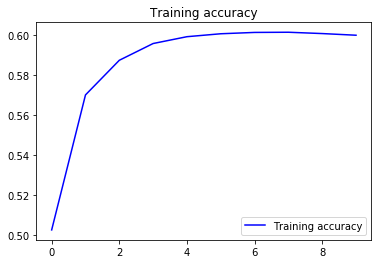

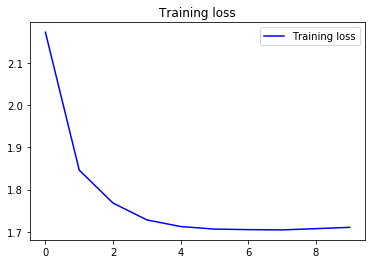

In [11]:
accuracy = hist3['acc']
#val_accuracy = hist3['val_acc']
loss = hist3['loss']
#val_loss = hist3['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
#plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
#plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training loss')
plt.legend()
plt.show()

Another round of testing on an unseen data set on the trained models.

In [22]:
from keras.models import load_model
model_load = load_model('model3.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


Create another list of testing samples other than training and validation set.

In [5]:
x_test1 = load("data/", True, files[:200],N,10)
with open('test1', 'ab') as fp:
    pickle.dump(x_test1, fp)

loaded file 1
loaded file 2
loaded file 3
loaded file 4
loaded file 5
loaded file 6
loaded file 7
loaded file 8
loaded file 9
loaded file 10
loaded file 11
loaded file 12
loaded file 13
loaded file 14
loaded file 15
loaded file 16
loaded file 17
loaded file 18
loaded file 19
loaded file 20
loaded file 21
loaded file 22
loaded file 23
loaded file 24
loaded file 25
loaded file 26
loaded file 27
loaded file 28
loaded file 29
loaded file 30
loaded file 31
loaded file 32
loaded file 33
loaded file 34
loaded file 35
loaded file 36
loaded file 37
loaded file 38
loaded file 39
loaded file 40
loaded file 41
loaded file 42
loaded file 43
loaded file 44
loaded file 45
loaded file 46
loaded file 47
loaded file 48
loaded file 49
loaded file 50
loaded file 51
loaded file 52
loaded file 53
loaded file 54
loaded file 55
loaded file 56
loaded file 57
loaded file 58
loaded file 59
loaded file 60
loaded file 61
loaded file 62
loaded file 63
loaded file 64
loaded file 65
loaded file 66
loaded file 67
load

In [5]:
x_test2 = load("data/", True, files[200:],N,10)
with open('test2', 'ab') as fp:
    pickle.dump(x_test2, fp)

loaded file 1
loaded file 2
loaded file 3
loaded file 4
loaded file 5
loaded file 6
loaded file 7
loaded file 8
loaded file 9
loaded file 10
loaded file 11
loaded file 12
loaded file 13
loaded file 14
loaded file 15
loaded file 16
loaded file 17
loaded file 18
loaded file 19
loaded file 20
loaded file 21
loaded file 22
loaded file 23
loaded file 24
loaded file 25
loaded file 26
loaded file 27
loaded file 28
loaded file 29
loaded file 30
loaded file 31
loaded file 32
loaded file 33
loaded file 34
loaded file 35
loaded file 36
loaded file 37
loaded file 38
loaded file 39
loaded file 40
loaded file 41
loaded file 42
loaded file 43
loaded file 44
loaded file 45
loaded file 46
loaded file 47
loaded file 48
loaded file 49
loaded file 50
loaded file 51
loaded file 52
loaded file 53
loaded file 54
loaded file 55
loaded file 56
loaded file 57
loaded file 58
loaded file 59
loaded file 60
loaded file 61
loaded file 62
loaded file 63
loaded file 64
loaded file 65
loaded file 66
loaded file 67
load

In [15]:
with open('test1', 'rb') as fp:
    x_test1 = pickle.load(fp)
with open('test2', 'rb') as fp:
    x_test2 = pickle.load(fp)

In [16]:
x_test=x_test1+x_test2
with open('test_final', 'ab') as fp:
    pickle.dump(x_test, fp)

In [18]:
x_test = list(map(normalize, x_test))
test_labels = make_labels(N_LABELS, 10)

In [19]:
x_test = set_limit(x_test, N)

In [23]:
predsTest = model_load.predict(np.array(x_test))
score = 0
for i in range(len(predsTest)):
    if np.argmax(predsTest[i]) == test_labels[i]:
        score += 1

print("Accuracy: ", ((score + 0.0) / len(predsTest)) * 100)

Accuracy:  61.10144927536232
